In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
# Load the diabetes dataset
data = pd.read_csv('/miniproject1/diabetes.csv')

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [4]:
# Separate features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [7]:
# Prepare to store accuracy scores
acc_scores = {}

In [8]:

# Train, predict, and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_scores[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.4f}")


Logistic Regression: Accuracy = 0.7900
SVM: Accuracy = 0.7650
KNN: Accuracy = 0.7900
Random Forest: Accuracy = 0.9900
Naive Bayes: Accuracy = 0.7775
Gradient Boosting: Accuracy = 0.8875


In [10]:
# Identify the best model based on accuracy
best_model_name = max(acc_scores, key=acc_scores.get)
best_model = classifiers[best_model_name]

print(f"\nBest model: {best_model_name} with accuracy = {acc_scores[best_model_name]:.4f}")


Best model: Random Forest with accuracy = 0.9900


In [13]:
# Save the best model as a pickle file
model_filename = 'best_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
    print(f"Best model saved to {model_filename}")

Best model saved to best_model.pkl


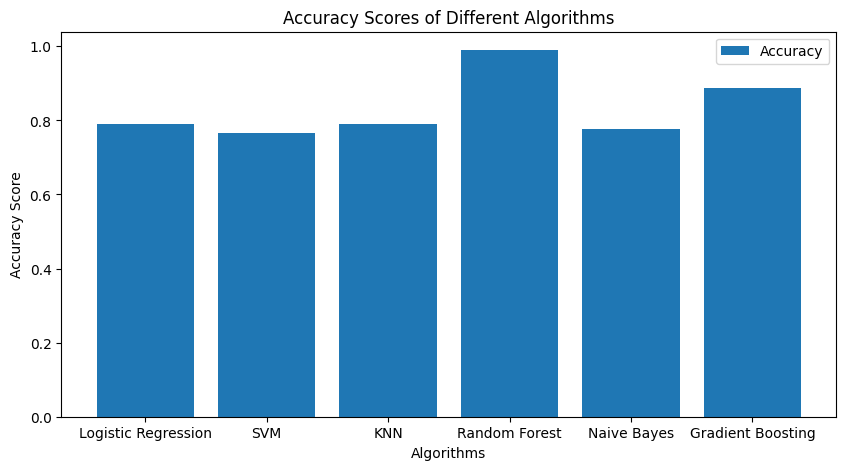

In [14]:
# Plot Accuracy Scores
plt.figure(figsize=(10, 5))
plt.bar(acc_scores.keys(), acc_scores.values(), label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algorithms')
plt.title('Accuracy Scores of Different Algorithms')
plt.legend()
plt.show()
